A **Simple Neural Network** in TensorFlow is a basic **implementation** of a neural network model using the TensorFlow library. \
It typically consists of `an input layer, one or more hidden layers, and an output layer`. \
The model is designed to learn patterns from data through training, allowing it to make predictions or classifications based on new input data. \
TensorFlow provides various tools and functions to create, train, and evaluate neural networks efficiently.

### Importing the Libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

c:\Users\LENOVO\miniconda3\envs\tf_env\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


### Titanic dataset from seaborn

In [2]:
data = sns.load_dataset('titanic')
data.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


### Removing the missing values

In [3]:
df = data.dropna(subset=['age', 'embarked'])
df.isnull().sum().sum()

np.int64(530)

###  Encoding the categorical features

In [4]:
df = pd.get_dummies(df, columns=['sex', 'embarked', 'class', 'who', 'deck'], drop_first=True)

### Defining the feature columns and target column and splitting the data

In [5]:
X = df.drop(['survived', 'alive', 'embark_town', 'adult_male', 'alone'], axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Scaling the feature columns

In [6]:
# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Defining the layers of the Neural Network

How many types of activation functions are there?
**Activation functions** are mathematical functions used in neural networks to introduce non-linearity into the model, allowing it to learn complex patterns in the data. There are several types of activation functions, each with its own characteristics and use cases. Some of the most common types include:
1. **Sigmoid**: Outputs values between 0 and 1, commonly used in binary classification problems.
2. **Tanh (Hyperbolic Tangent)**: Outputs values between -1 and 1, often used in hidden layers of neural networks.
3. **ReLU (Rectified Linear Unit)**: Outputs the input directly if it is positive; otherwise, it outputs zero. It is widely used in deep learning due to its simplicity and effectiveness.
4. **Leaky ReLU**: A variant of ReLU that allows a small, non-zero gradient when the input is negative, helping to prevent the "dying ReLU" problem.
5. **Softmax**: Used in multi-class classification problems, it converts logits into probabilities that sum to 1.


In [7]:
input_layer = tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],))
output_layer = tf.keras.layers.Dense(1, activation='relu')


import warnings
warnings.filterwarnings('ignore')

c:\Users\LENOVO\miniconda3\envs\tf_env\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Creating the model

**Creating the model** refers to the process of defining the `architecture of the neural network`. \
This involves specifying the number and types of layers, the number of neurons in each layer, the activation functions to be used, and how the layers are connected. \
In TensorFlow, this is typically done using the Sequential API or the Functional API, where you can stack layers together to form a complete model that can be trained on data.

In [8]:
model = tf.keras.models.Sequential([
    input_layer,
    output_layer
])

### Compiling the model

An **optimizer** in neural networks is an algorithm or method used to adjust the weights and biases of the network during training in order to minimize the loss function. \
The optimizer determines how the model learns from the data by updating the parameters based on the computed gradients. \
Common optimizers include `Stochastic Gradient Descent (SGD), Adam, RMSprop, and Adagrad`, each with its own approach to updating the model parameters to improve convergence and performance.

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Fitting the model

In the context of training neural networks, an **epoch** refers to one complete pass through the entire training dataset. During an epoch, the model processes each training example once and updates its weights based on the computed gradients. \
Training a model typically involves multiple epochs, allowing the model to learn and improve its performance over time. The number of epochs is a hyperparameter that can be adjusted based on the complexity of the model and the dataset.


In [10]:
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6907 - loss: 3.4498
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6872 - loss: 3.3692 
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6960 - loss: 3.2858 
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7188 - loss: 3.0735 
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7364 - loss: 2.7354 
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7522 - loss: 2.5866 
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7592 - loss: 2.3035 
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7698 - loss: 2.1212 
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7768 - loss: 2.0329 
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7803 - loss: 1.9559 
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7821 - loss: 1.8980 
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0

### Evaluating the model

In [11]:
loss, accuracy = model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7902 - loss: 2.2249 


### Plotting the training and validation loss curves

In [12]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=0)
print(f'History Keys: {history.history.keys()}')

History Keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


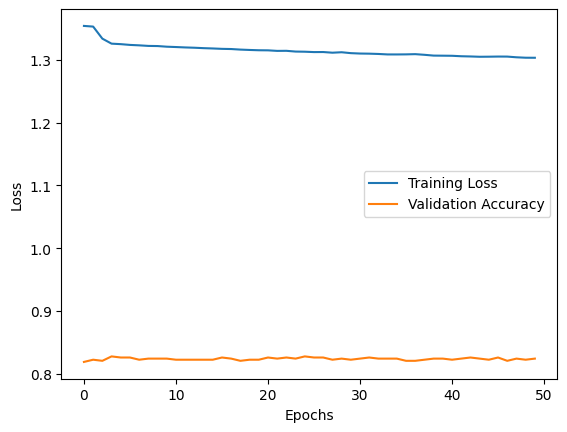

In [13]:
# plotting training and validation loss curves
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Checking For GPU

In [14]:
import sys
import tensorflow as tf
import pandas as pd
import sklearn as sk
import scipy as sp
import tensorflow as tf
import platform

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print(f"SciPy {sp.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: Windows-10-10.0.26100-SP0
Tensor Flow Version: 2.20.0

Python 3.11.14 | packaged by Anaconda, Inc. | (main, Oct 21 2025, 18:30:03) [MSC v.1929 64 bit (AMD64)]
Pandas 2.3.3
Scikit-Learn 1.8.0
SciPy 1.16.3
GPU is NOT AVAILABLE
